# EDA - dataset CSE-CIC-IDS2018

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the dataset

In [2]:
# Define the file paths
file_paths = [
    "../datasets/CSE-CIC-IDS2018/02-14-2018_sampled.csv",
    "../datasets/CSE-CIC-IDS2018/02-15-2018_sampled.csv",
    "../datasets/CSE-CIC-IDS2018/02-16-2018_sampled.csv",
    "../datasets/CSE-CIC-IDS2018/02-21-2018_sampled.csv",
    "../datasets/CSE-CIC-IDS2018/02-22-2018_sampled.csv",
    "../datasets/CSE-CIC-IDS2018/02-23-2018_sampled.csv",
    "../datasets/CSE-CIC-IDS2018/02-28-2018_sampled.csv",
    "../datasets/CSE-CIC-IDS2018/03-01-2018_sampled.csv",
    "../datasets/CSE-CIC-IDS2018/03-02-2018_sampled.csv",
]

# Initialize an empty DataFrame
df = pd.DataFrame()

# Process files
for file_path in file_paths:
    df = pd.concat([df, pd.read_csv(file_path)], axis=0, ignore_index=True)

In [3]:
# Creation of a bool column Attack (this will be done in the pipeline, as well as data cleaning and preprocessing)
df.rename(columns={'Label': 'attack_type'}, inplace=True)
df['attack'] = df['attack_type'].apply(lambda x: False if x == 'Benign' else True)

# Drop constant columns (also this will be done in the pipeline)
df.drop(columns=[col for col in df.columns if df[col].nunique() == 1], inplace=True)

# Fix negative and infinite values (also this will be done in the pipeline)
df = df.replace([np.inf, -np.inf], np.nan)  # Replace inf/-inf with NaN temporarily
for col in df.columns:
    if df[col].dtype not in ['object', 'category', 'bool']:  # Ensure numeric columns
        max_val = df[df[col] > 0][col].max()
        df[col] = df[col].fillna(max_val)  # Replace inf and NaN caused by inf
        min_val = df[df[col] >= 0][col].min()
        df[col] = df[col].apply(lambda x: min_val if x < 0 else x)  # Replace negative values with the minimum

# Drop useless columns (also this will be done in the pipeline)
df.drop(columns=['Dst Port', 'Timestamp'], inplace=True)

# Cast integer columns with min value 0 and max value 1 to bool (also this will be done in the pipeline)
columns_to_cast = [col for col in df.columns
                   if pd.api.types.is_integer_dtype(df[col]) and df[col].min() == 0 and df[col].max() == 1]
df[columns_to_cast] = df[columns_to_cast].astype(bool)

df.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,attack_type,attack
0,6,927522,7,5,364,582.0,103,0,52.000000,49.217206,409,0,116.4,167.035326,1019.921899,12.937699,84320.181818,95766.049975,226662.0,62.0,927522.0,154587.000000,76550.335519,226730.0,7710.0,726894.0,181723.5,30215.457727,226727.0,161656.0,False,False,152,112,7.546991,5.390708,0,409,72.769231,109.533217,11997.525641,False,False,False,True,False,False,False,False,0,78.833333,52.000000,116.4,7,364,5,582,8192,259,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False
1,17,1029,1,1,34,79.0,34,34,34.000000,0.000000,79,79,79.0,0.000000,109815.354713,1943.634597,1029.000000,0.000000,1029.0,1029.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,False,False,8,8,971.817298,971.817298,34,79,49.000000,25.980762,675.000000,False,False,False,False,False,False,False,False,1,73.500000,34.000000,79.0,1,34,1,79,0,0,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False
2,6,829744,7,5,364,582.0,103,0,52.000000,49.217206,409,0,116.4,167.035326,1140.110685,14.462292,75431.272727,85350.463604,166257.0,39.0,829744.0,138290.666667,65840.304363,167709.0,3934.0,663448.0,165862.0,3293.945658,170699.0,163568.0,False,False,152,112,8.436337,6.025955,0,409,72.769231,109.533217,11997.525641,False,False,False,True,False,False,False,False,0,78.833333,52.000000,116.4,7,364,5,582,8192,259,4,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False
3,6,74,3,0,31,0.0,31,0,10.333333,17.897858,0,0,0.0,0.000000,418918.918919,40540.540541,37.000000,52.325902,74.0,0.0,74.0,37.000000,52.325902,74.0,0.0,0.0,0.0,0.000000,0.0,0.0,False,False,60,0,40540.540541,0.000000,0,31,7.750000,15.500000,240.250000,False,False,False,False,True,False,False,False,0,10.333333,10.333333,0.0,3,31,0,0,64,0,1,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False
4,6,969,2,1,38,0.0,38,0,19.000000,26.870058,0,0,0.0,0.000000,39215.686275,3095.975232,484.500000,654.073773,947.0,22.0,969.0,969.000000,0.000000,969.0,969.0,0.0,0.0,0.000000,0.0,0.0,True,False,40,20,2063.983488,1031.991744,0,38,19.000000,21.939310,481.333333,False,True,False,False,True,False,False,False,0,25.333333,19.000000,0.0,2,38,1,0,123,0,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,False


In [4]:
df.shape

(899987, 71)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Protocol,899987.0,8.348675e+00,4.647248e+00,0.000000,6.000000,6.000000,6.000000e+00,1.700000e+01
Flow Duration,899987.0,1.120674e+07,2.988821e+07,0.000000,467.000000,12951.000000,2.488092e+06,1.200000e+08
Tot Fwd Pkts,899987.0,2.623351e+01,1.576986e+03,1.000000,1.000000,2.000000,5.000000e+00,1.567810e+05
Tot Bwd Pkts,899987.0,6.357452e+00,2.512235e+02,0.000000,0.000000,1.000000,4.000000e+00,1.231180e+05
TotLen Fwd Pkts,899987.0,1.093285e+03,5.394284e+04,0.000000,0.000000,42.000000,5.940000e+02,1.348670e+07
TotLen Bwd Pkts,899987.0,4.967228e+03,3.421107e+05,0.000000,0.000000,86.000000,3.620000e+02,1.563604e+08
Fwd Pkt Len Max,899987.0,2.217463e+02,3.365881e+02,0.000000,0.000000,40.000000,3.400000e+02,6.444000e+04
Fwd Pkt Len Min,899987.0,9.830100e+00,2.659436e+01,0.000000,0.000000,0.000000,0.000000e+00,1.460000e+03
Fwd Pkt Len Mean,899987.0,5.376708e+01,6.960231e+01,0.000000,0.000000,35.000000,8.421429e+01,1.652931e+04
Fwd Pkt Len Std,899987.0,8.246757e+01,1.337998e+02,0.000000,0.000000,0.000000,1.436829e+02,1.840158e+04


## Data Cleaning Checks

### Missing Values

In [6]:
df.isnull().sum()

Protocol             0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Fwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
FIN Flag Cnt         0
SYN Flag Cnt         0
RST Flag Cn

### Duplicate Rows

In [7]:
df[df.duplicated()].head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,attack_type,attack
11,6,6,1,1,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,333333.333333,6.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,32,32,166666.666667,166666.666667,0,0,0.0,0.0,0.0,False,False,False,False,True,True,False,False,1,0.0,0.0,0.0,1,0,1,0,241,230,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SSH-Bruteforce,True
21,6,3,1,1,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,666666.666667,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,40,20,333333.333333,333333.333333,0,0,0.0,0.0,0.0,False,False,False,True,False,False,False,False,1,0.0,0.0,0.0,1,0,1,0,26883,0,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,True
26,6,2,1,1,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1000000.000000,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,40,20,500000.000000,500000.000000,0,0,0.0,0.0,0.0,False,False,False,True,False,False,False,False,1,0.0,0.0,0.0,1,0,1,0,26883,0,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,True
40,6,6,1,1,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,333333.333333,6.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,32,32,166666.666667,166666.666667,0,0,0.0,0.0,0.0,False,False,False,False,True,True,False,False,1,0.0,0.0,0.0,1,0,1,0,241,230,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SSH-Bruteforce,True
41,6,2,1,1,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1000000.000000,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,40,20,500000.000000,500000.000000,0,0,0.0,0.0,0.0,False,False,False,True,False,False,False,False,1,0.0,0.0,0.0,1,0,1,0,26883,0,0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,FTP-BruteForce,True


In [8]:
# Exclude duplicate rows from train_data (also this will be done in the pipeline)
df = df[~df.duplicated()]

In [9]:
df.shape

(683177, 71)

## EDA

### Univariate Analysis

For each non-numerical column, show the values and plot the distribution

Column Fwd PSH Flags
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    656091
True      27086
Name: Fwd PSH Flags, dtype: int64



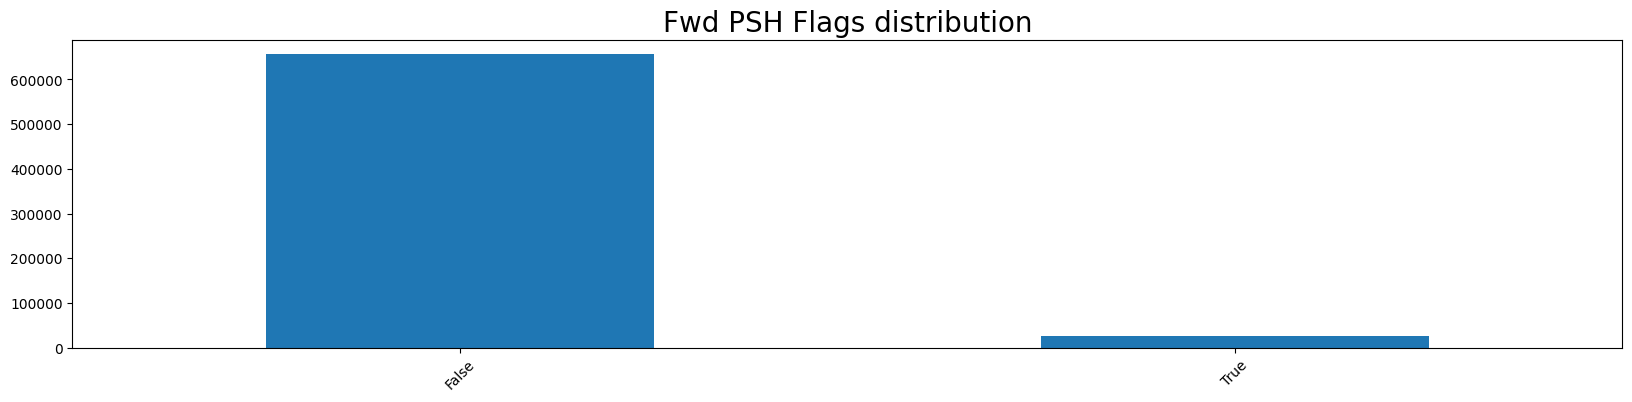

Column Fwd URG Flags
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    682643
True        534
Name: Fwd URG Flags, dtype: int64



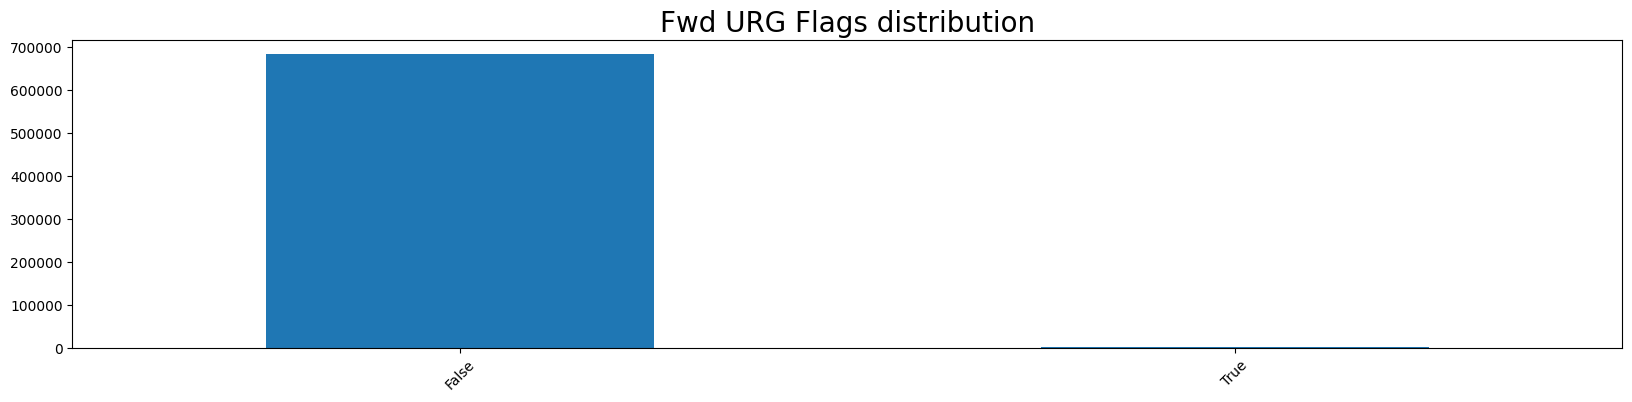

Column FIN Flag Cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    681139
True       2038
Name: FIN Flag Cnt, dtype: int64



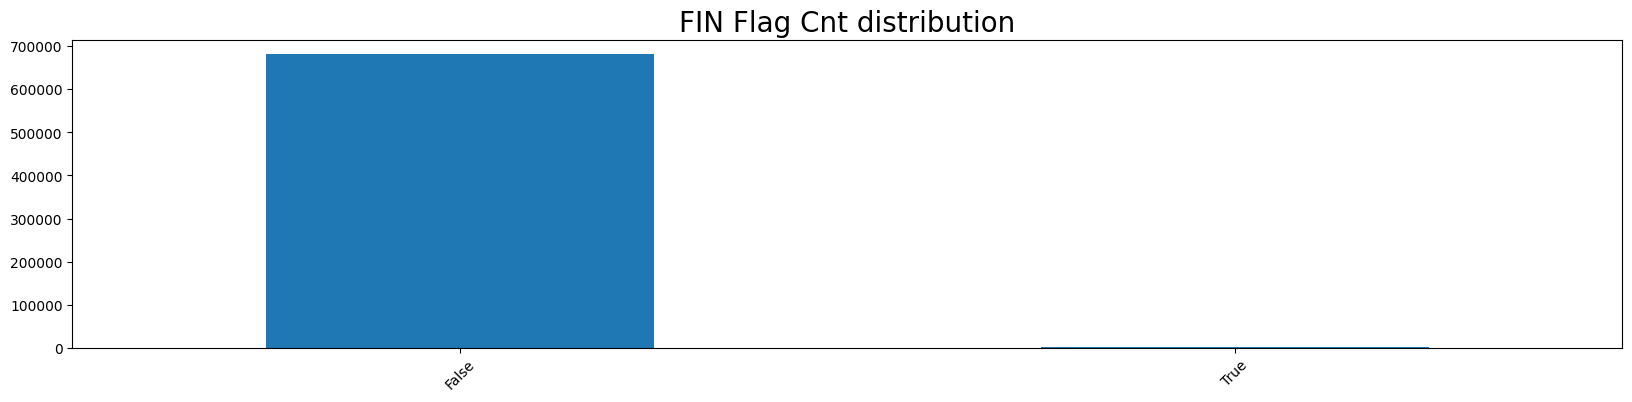

Column SYN Flag Cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    656091
True      27086
Name: SYN Flag Cnt, dtype: int64



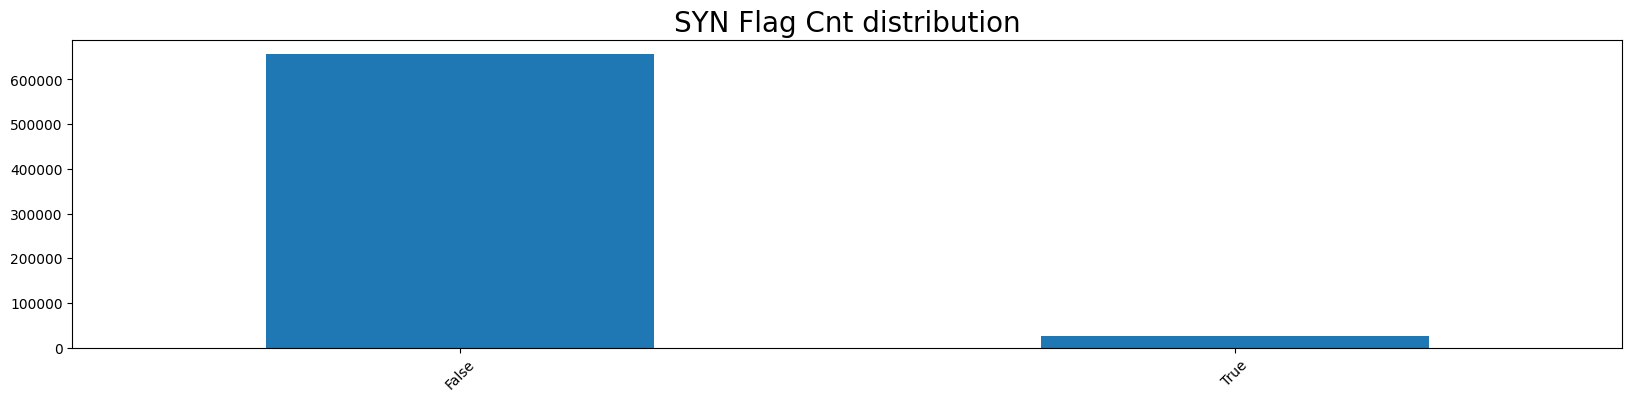

Column RST Flag Cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    531246
True     151931
Name: RST Flag Cnt, dtype: int64



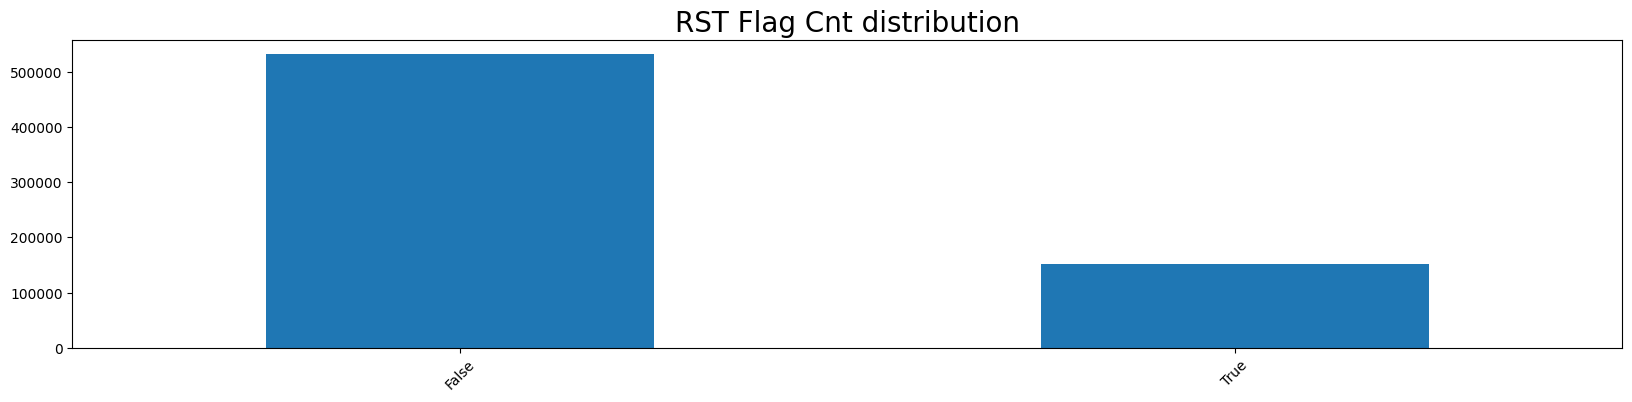

Column PSH Flag Cnt
------------------------------
Unique Values (2): [ True False]

Value Counts:
False    376610
True     306567
Name: PSH Flag Cnt, dtype: int64



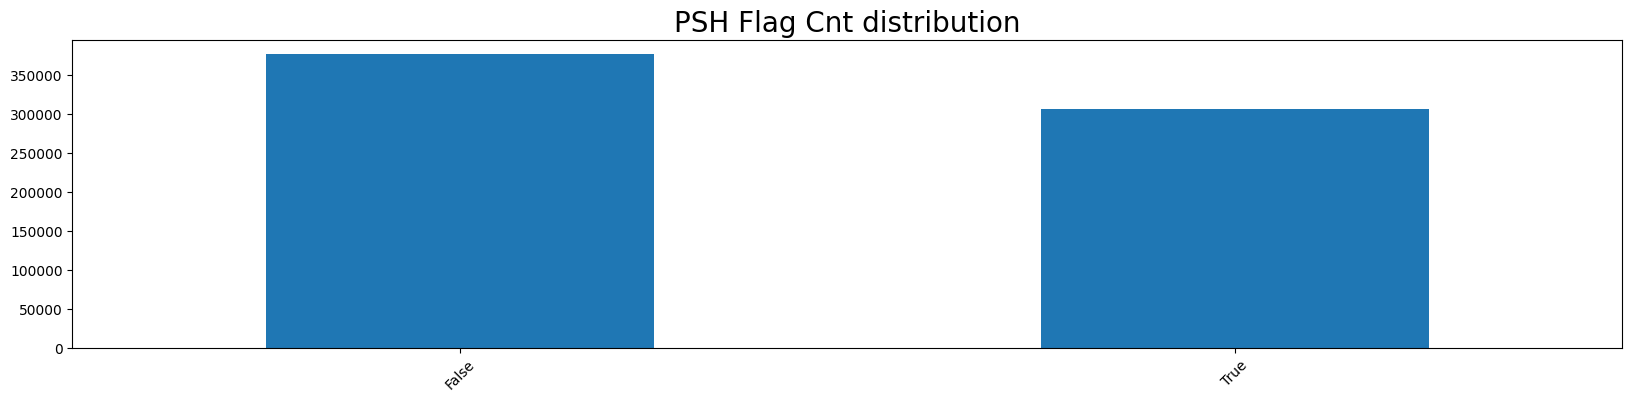

Column ACK Flag Cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    481092
True     202085
Name: ACK Flag Cnt, dtype: int64



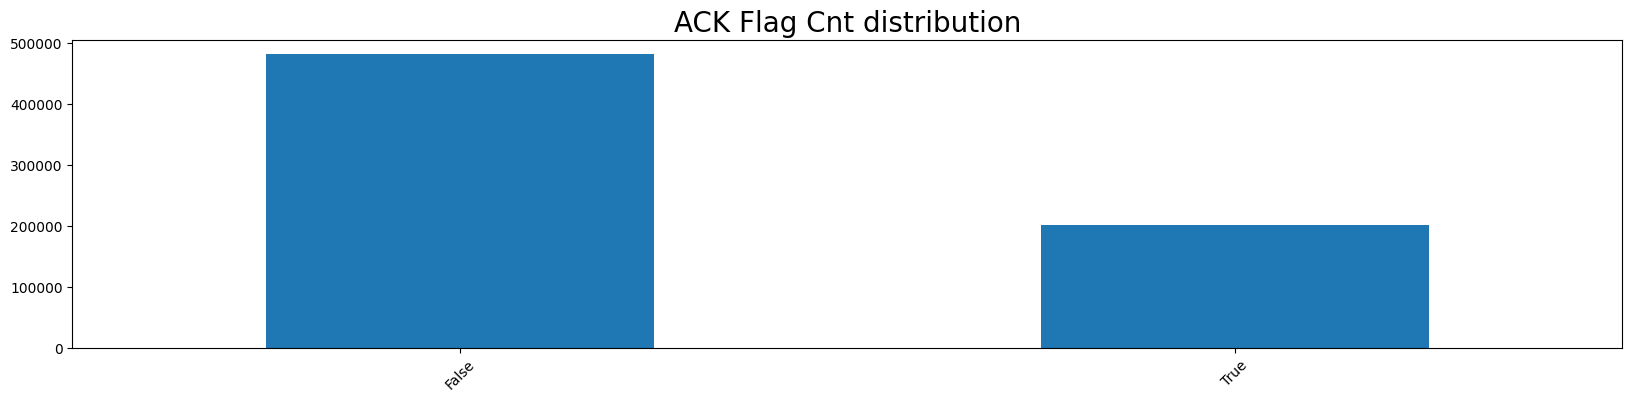

Column URG Flag Cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    664487
True      18690
Name: URG Flag Cnt, dtype: int64



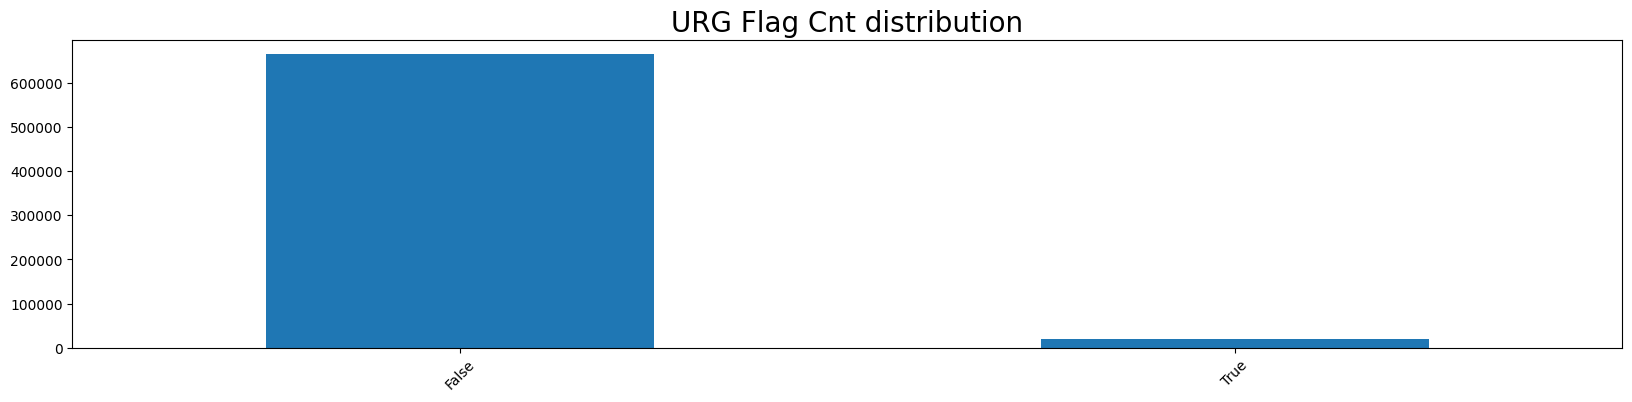

Column CWE Flag Count
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    682643
True        534
Name: CWE Flag Count, dtype: int64



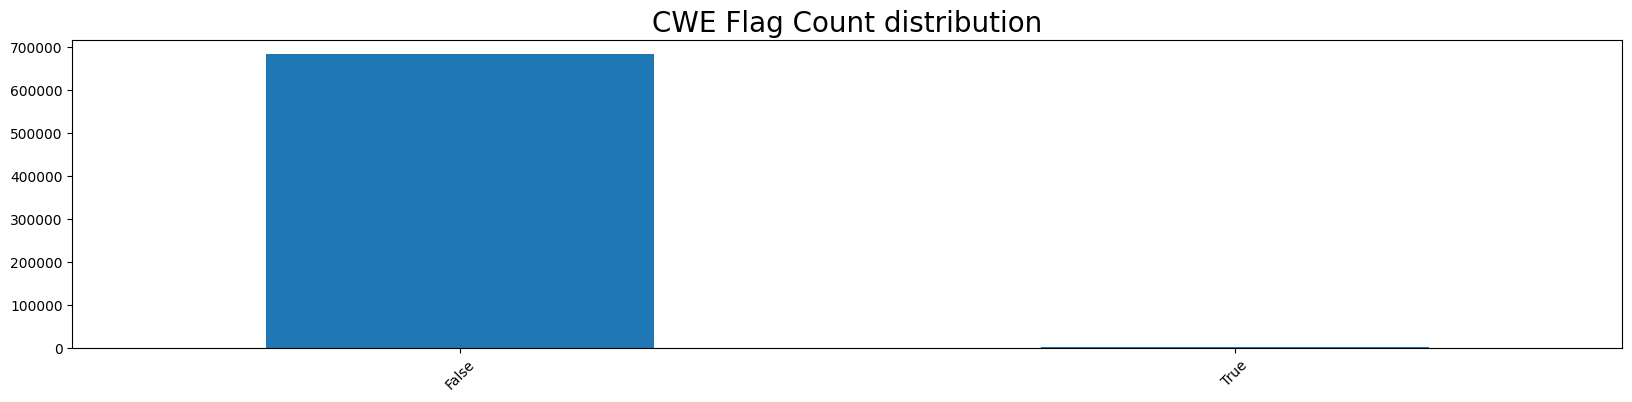

Column ECE Flag Cnt
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    531249
True     151928
Name: ECE Flag Cnt, dtype: int64



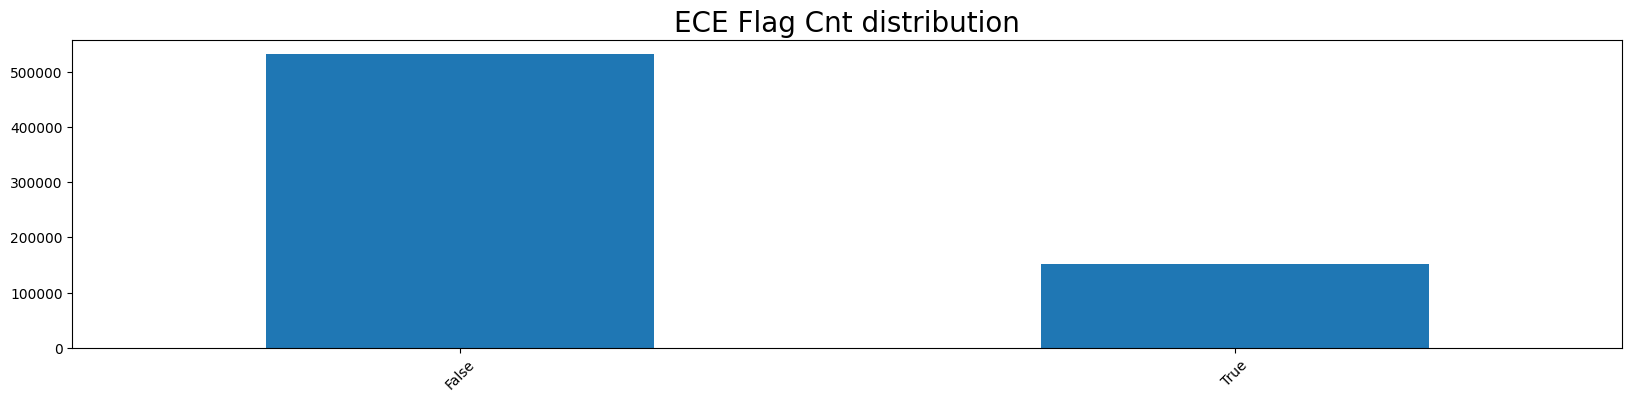

Column attack_type
------------------------------
Unique Values (14): ['Benign' 'SSH-Bruteforce' 'FTP-BruteForce' 'DoS attacks-GoldenEye'
 'DoS attacks-Slowloris' 'DoS attacks-Hulk' 'DoS attacks-SlowHTTPTest'
 'DDOS attack-HOIC' 'DDOS attack-LOIC-UDP' 'Brute Force -Web'
 'Brute Force -XSS' 'SQL Injection' 'Infilteration' 'Bot']

Value Counts:
Benign                      561650
DDOS attack-HOIC             34443
Infilteration                29547
DoS attacks-Hulk             28762
Bot                          14524
SSH-Bruteforce                8977
DoS attacks-GoldenEye         3958
DoS attacks-Slowloris          979
DDOS attack-LOIC-UDP           164
Brute Force -Web                56
DoS attacks-SlowHTTPTest        46
FTP-BruteForce                  42
Brute Force -XSS                21
SQL Injection                    8
Name: attack_type, dtype: int64



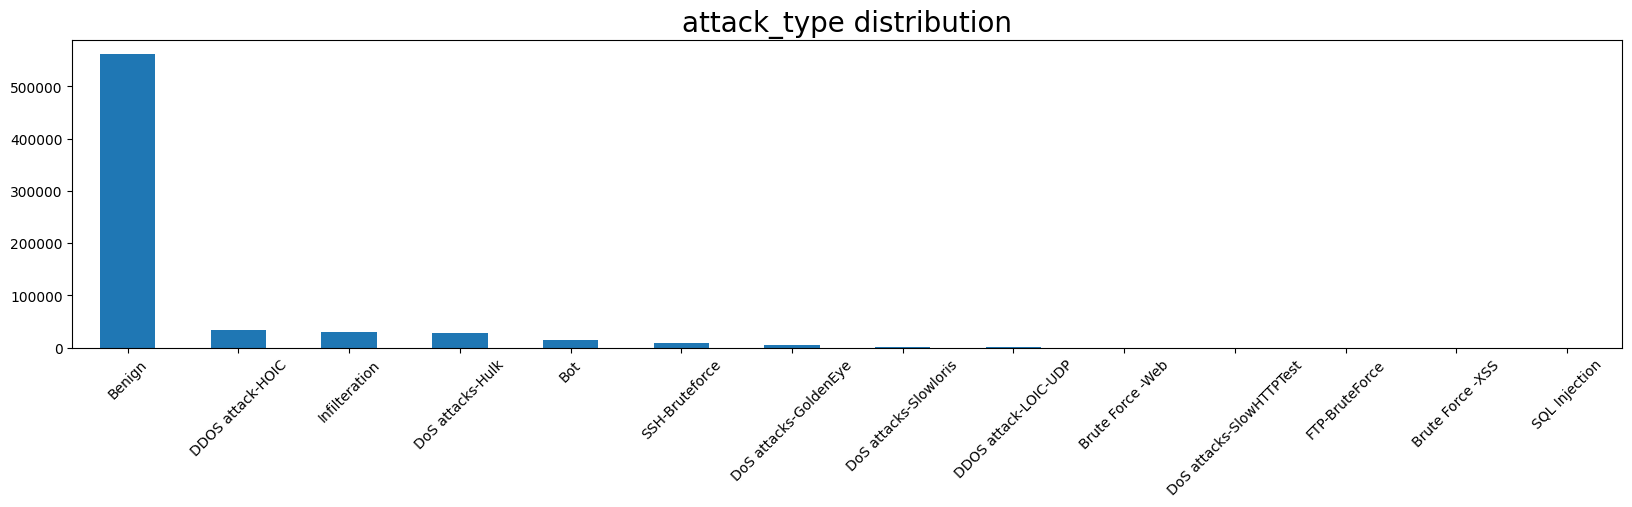

Column attack
------------------------------
Unique Values (2): [False  True]

Value Counts:
False    561650
True     121527
Name: attack, dtype: int64



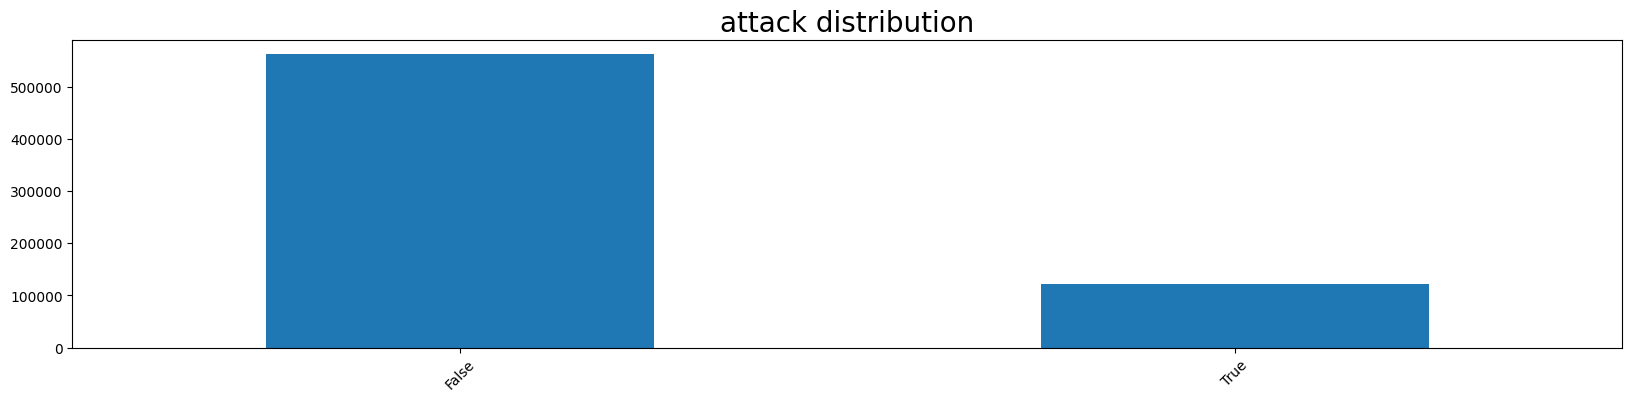

In [10]:
# Non-numerical columns
non_numerical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Show the distribution for each one
for column_name in non_numerical_columns:
    print(f"Column {column_name}\n{'-'*30}")
    unique_vals = df[column_name].unique()
    value_counts = df[column_name].value_counts()
    print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
    print(f"Value Counts:\n{value_counts}\n{'='*40}\n")
    plt.figure(figsize=(20,4))
    value_counts.plot(kind="bar")
    plt.title(f"{column_name} distribution", fontsize=20)
    plt.xticks(rotation=45)
    plt.show()

Violin plot for each numerical feature

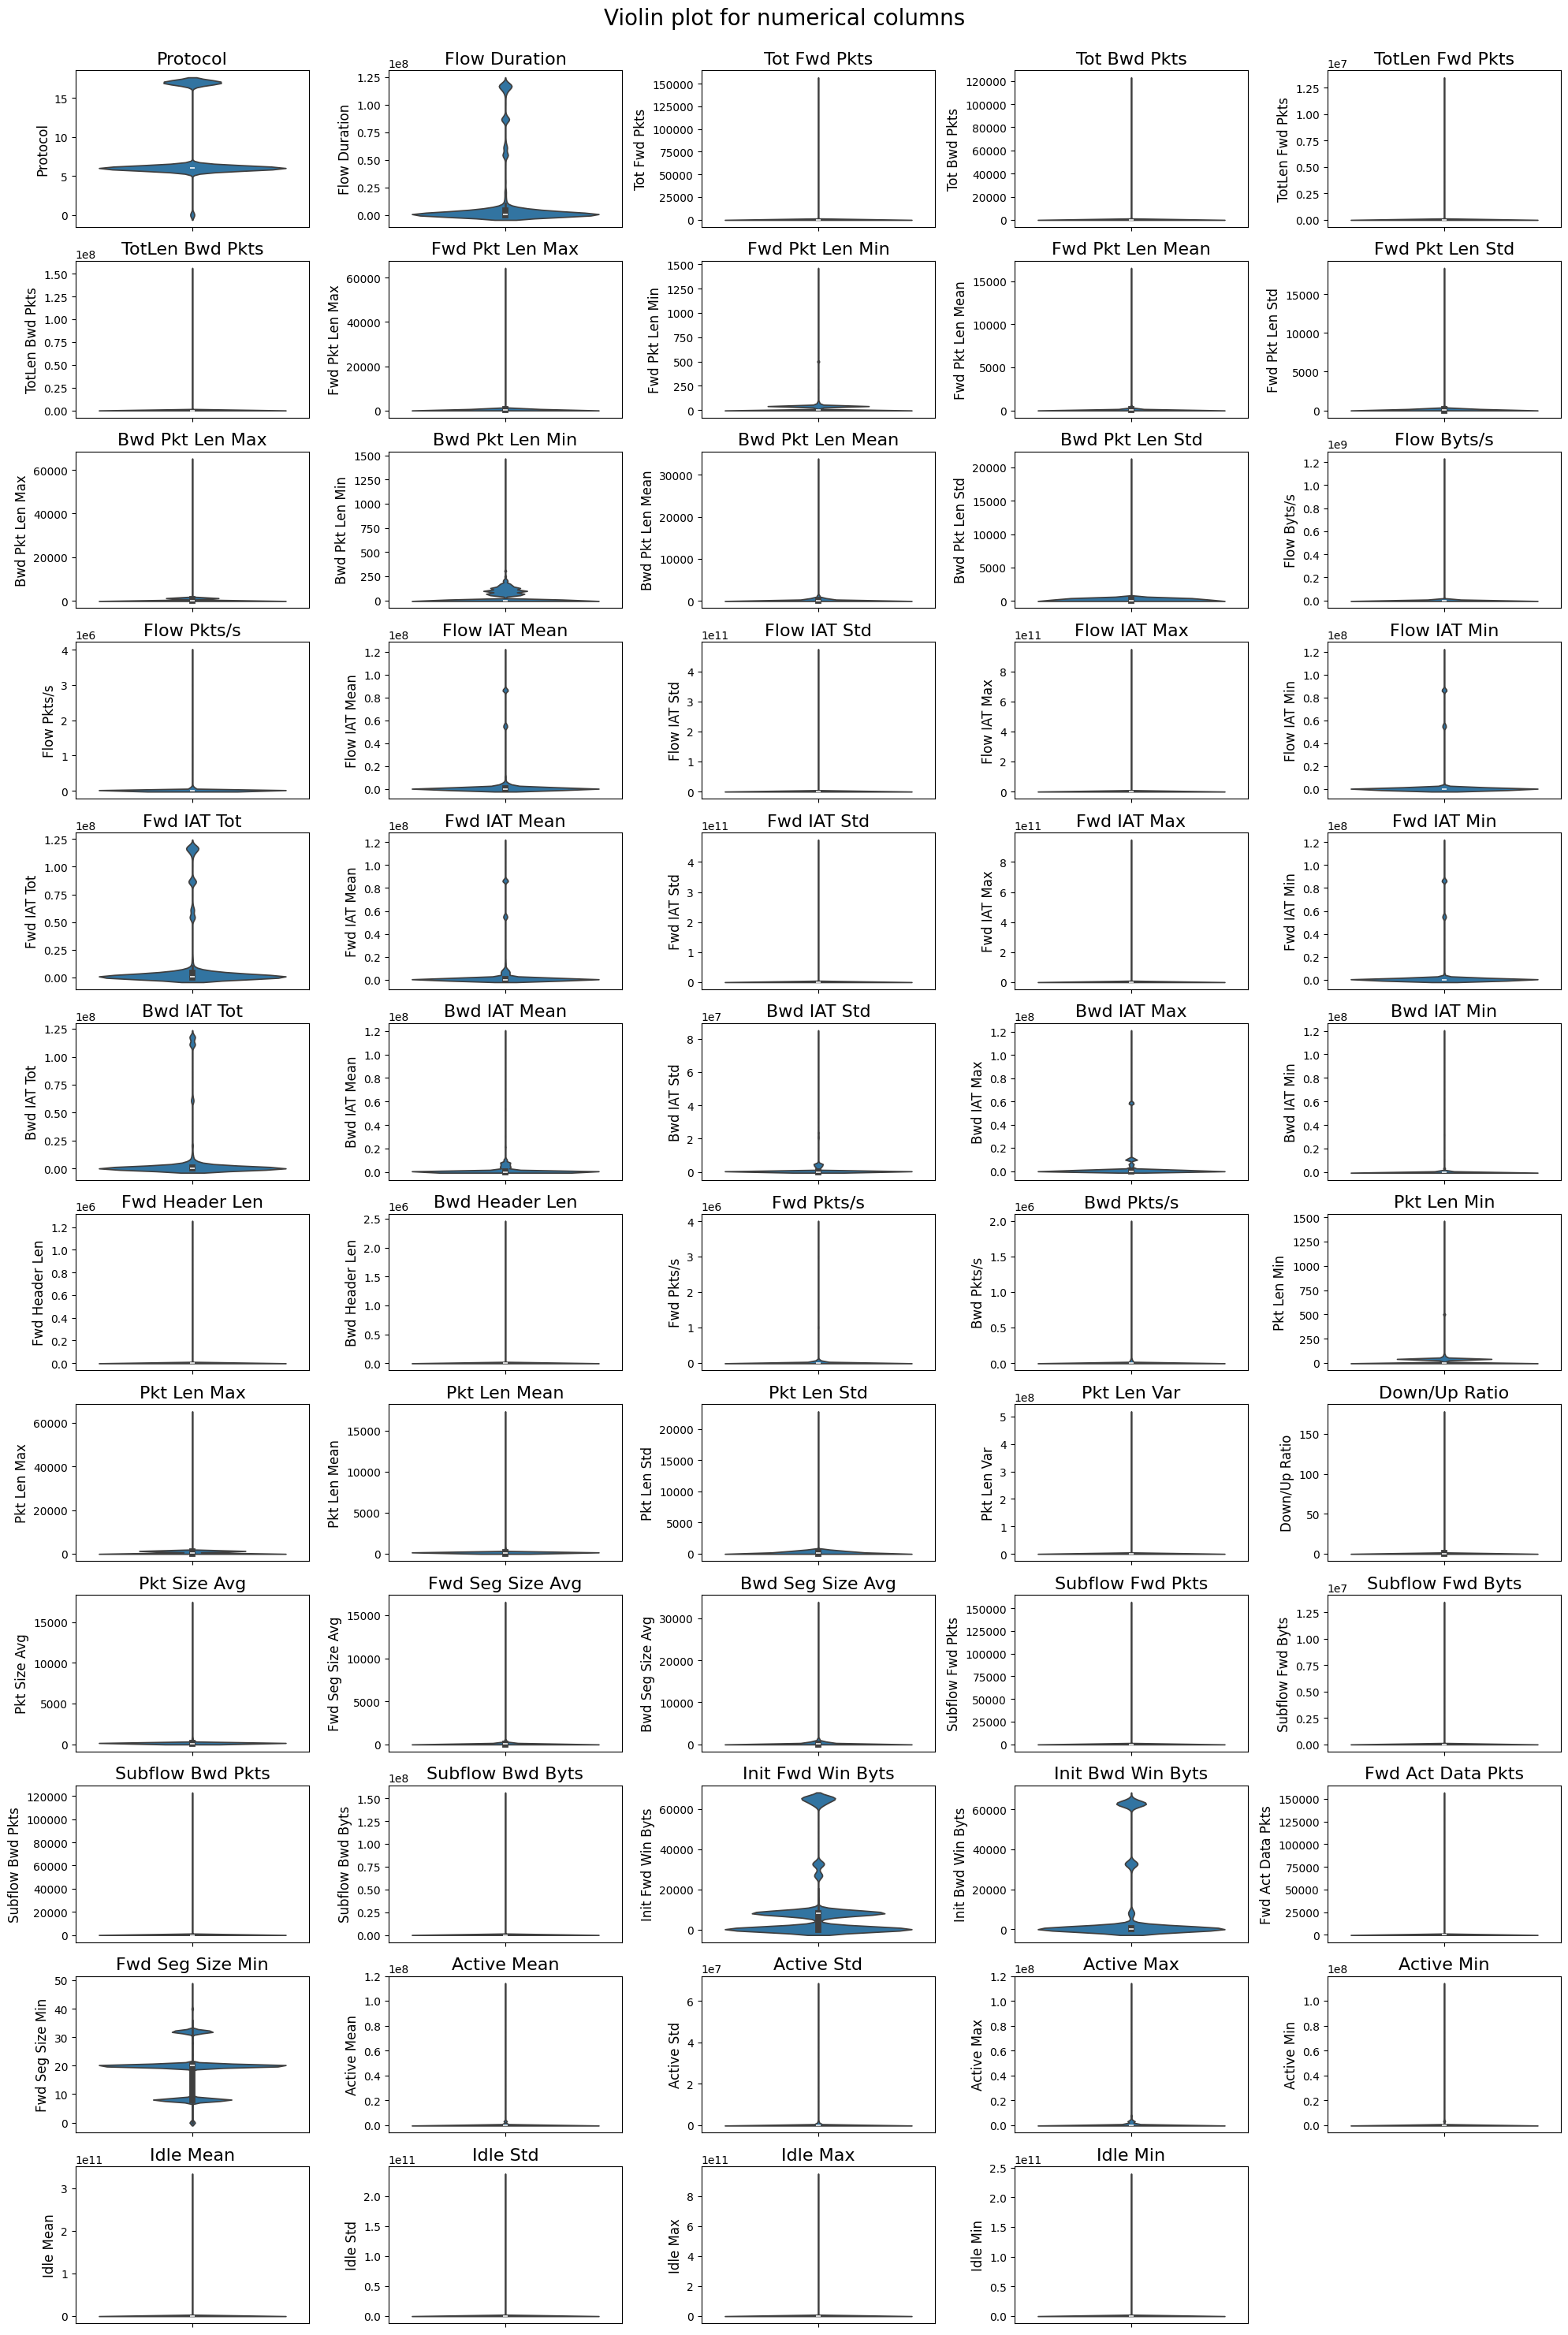

In [11]:
# Numerical columns
numerical_columns = df.select_dtypes(exclude=['object', 'category', 'bool']).columns.tolist()

# Create subplots for violin plots
fig, axes = plt.subplots(16, 5, figsize=(20, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate a violin plot for each numerical column
for i, col in enumerate(numerical_columns):
    sns.violinplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=12)

# Remove any extra subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Violin plot for numerical columns', fontsize=20)
plt.subplots_adjust(top=0.96)
plt.show()

Semi-log histogram for each numerical feature

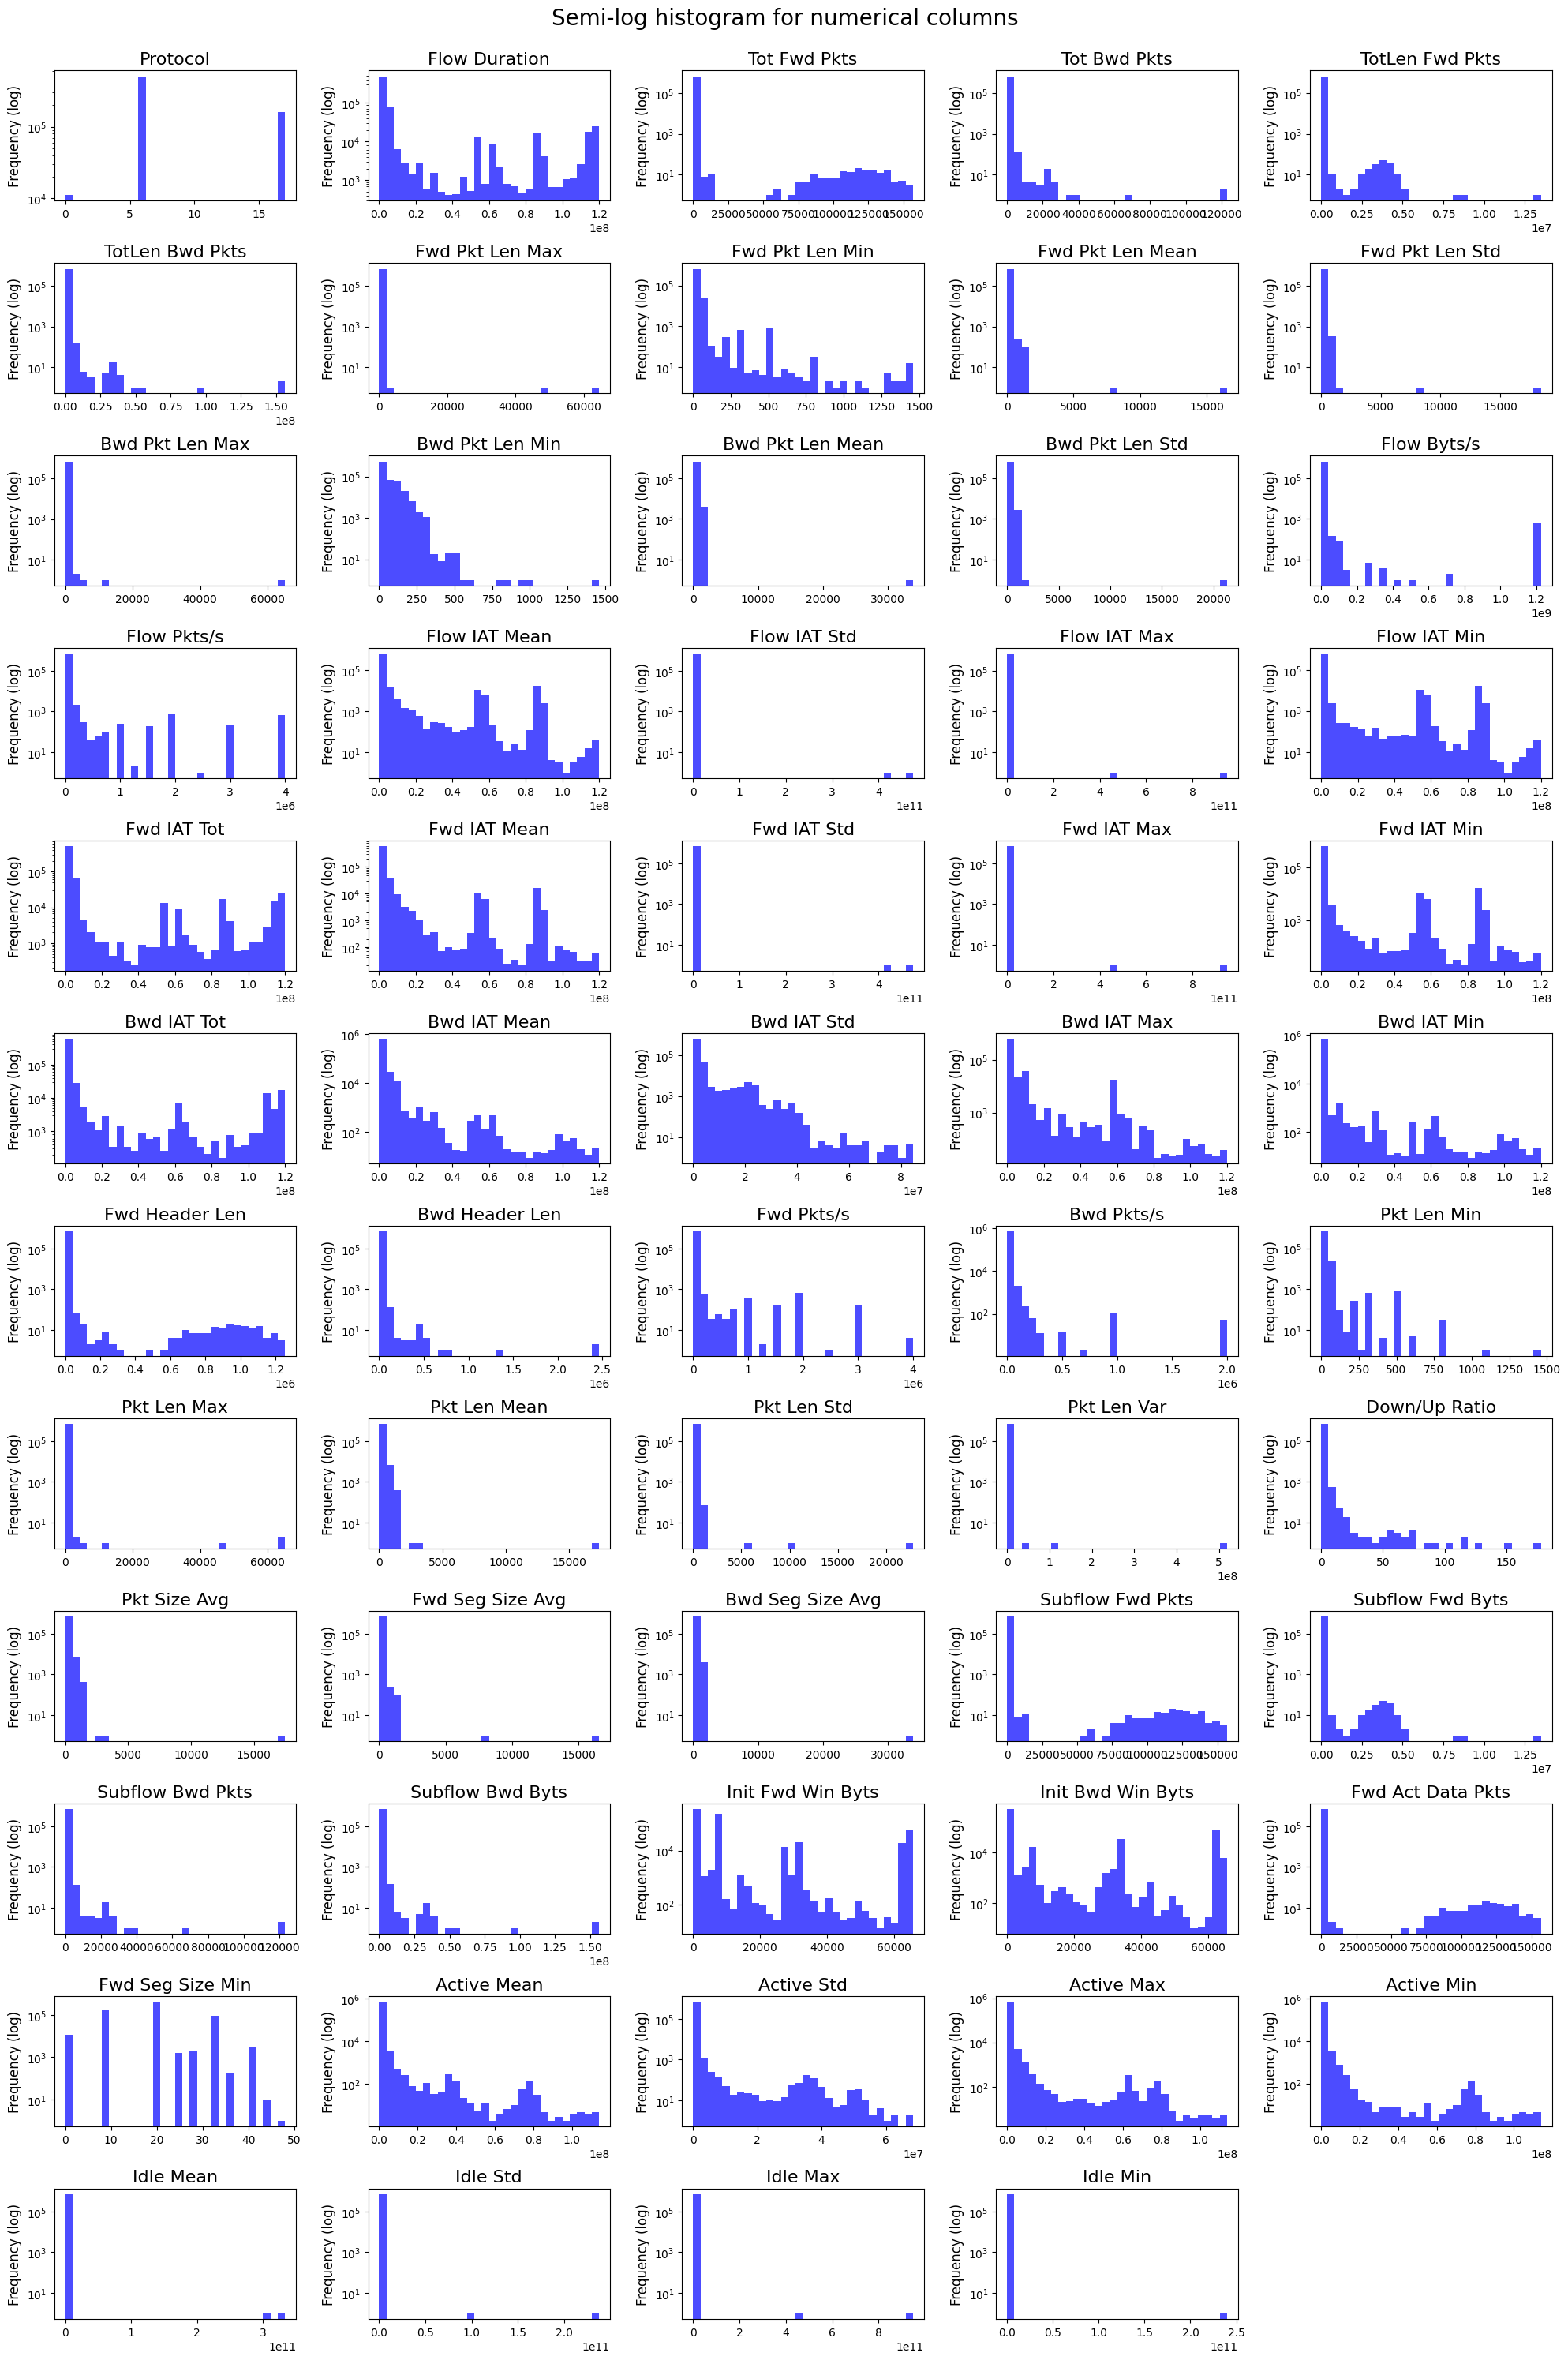

In [12]:
# Create subplots for semi-log histograms
fig, axes = plt.subplots(16, 5, figsize=(20, 40))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Generate a semi-log histogram for each numerical column
for i, col in enumerate(numerical_columns):
    axes[i].hist(df[col], bins=30, log=True, color='blue', alpha=0.7)
    axes[i].set_title(col, fontsize=16)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency (log)', fontsize=12)

# Remove any extra subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Semi-log histogram for numerical columns', fontsize=20)
plt.subplots_adjust(top=0.96)
plt.show()

Plot the distributions of Attack and Attack Types with percentages

In [13]:
def plot_distribution_with_percentages(col_name):
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(data=df, x=col_name, hue=col_name, legend=False)
    total = len(df)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        if percentage > 0:
            ax.annotate(f'{count} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2., p.get_height() * 0.985), 
                    ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.title(f"Distribution of {col_name} with percentages", fontsize=20)
    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.show()

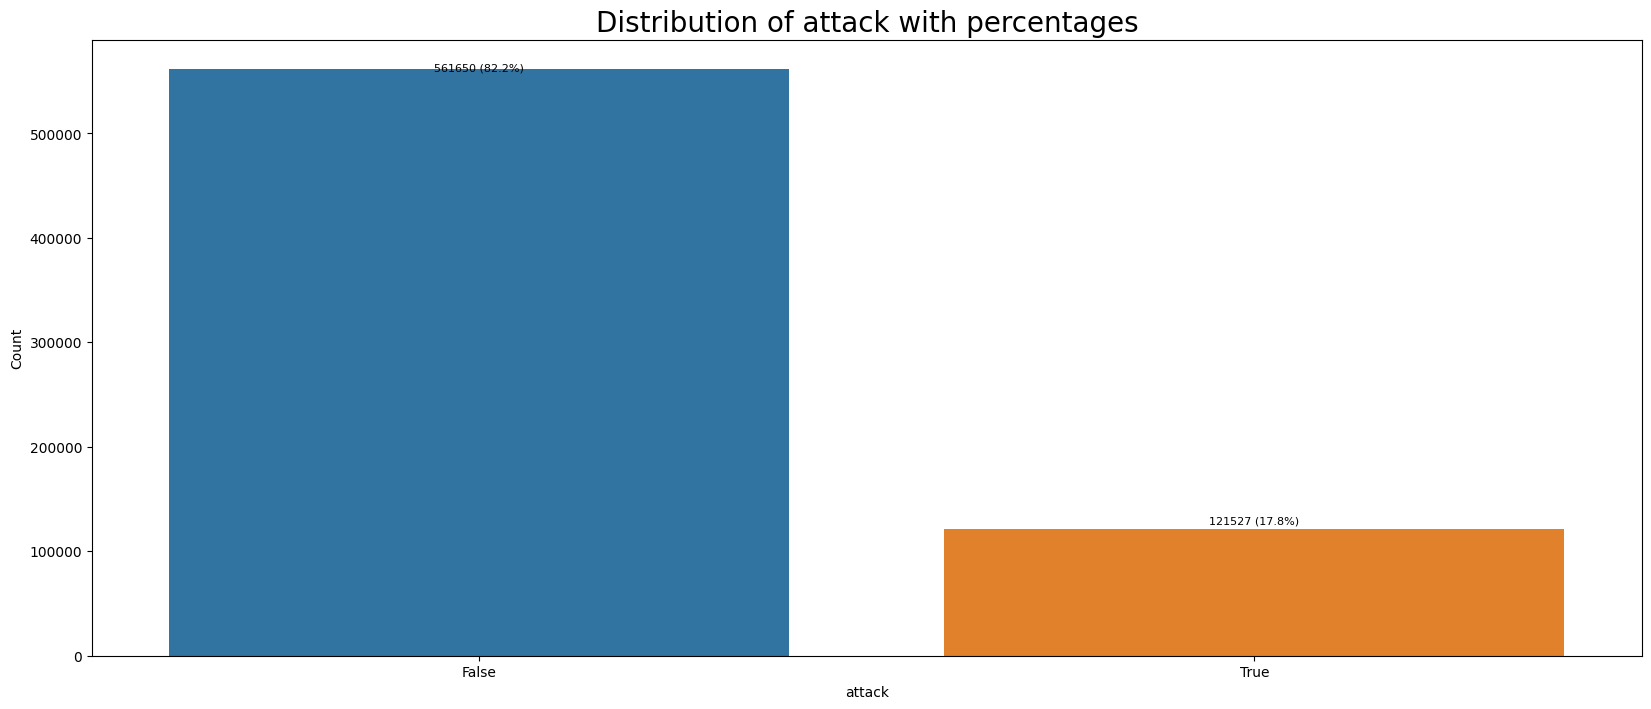

In [14]:
# Distribution of Attack with percentages
plot_distribution_with_percentages('attack')

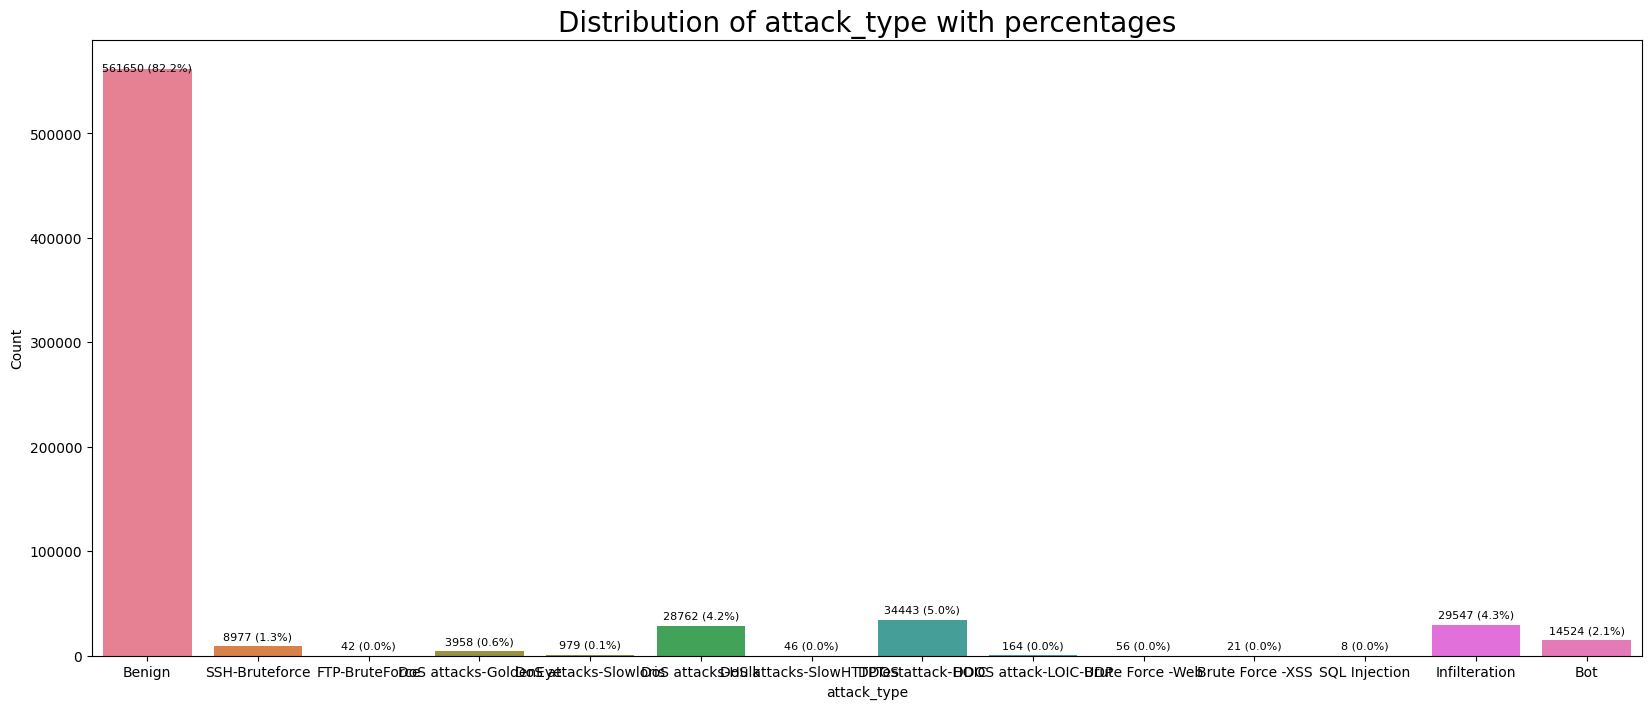

In [15]:
# Distribution of Attack Type with percentages
plot_distribution_with_percentages('attack_type')

### Covariate Analysis

In [16]:
# Compare column vs column
def hist_col_vs_col(col1, col2, top_n=10):
    # Get the top N categories by count in col2, to avoid a huge plot
    top_categories = df[col2].value_counts().head(top_n).index
    filtered_df = df[df[col2].isin(top_categories)]
    
    # Set dynamic title
    title_suffix = f" (top {top_n} for {col2})" if df[col2].nunique() > top_n else ""
    title = f'{col1} vs {col2}{title_suffix}'
    
    plt.figure(figsize=(20, 8))
    sns.countplot(x=col1, data=filtered_df, hue=col2, palette=sns.color_palette("dark", as_cmap=False, n_colors=filtered_df[col2].nunique()))
    plt.xticks(rotation=45)
    plt.title(title, fontsize=20)
    plt.legend(title=col2)
    plt.show()

Compare Attack vs Protocol Number

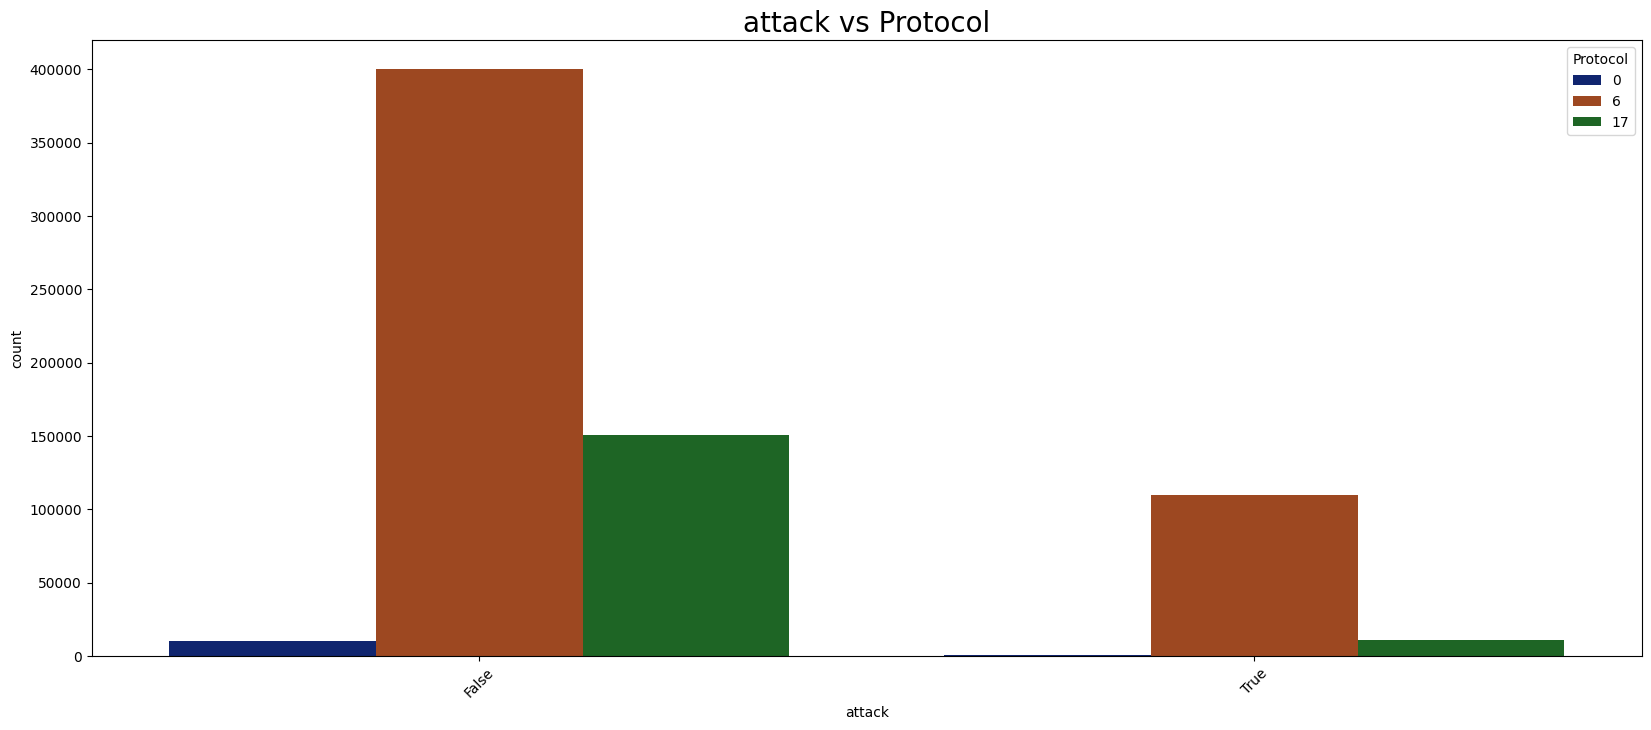

In [17]:
hist_col_vs_col('attack', 'Protocol')

Compare Attack Type vs Protocol Number

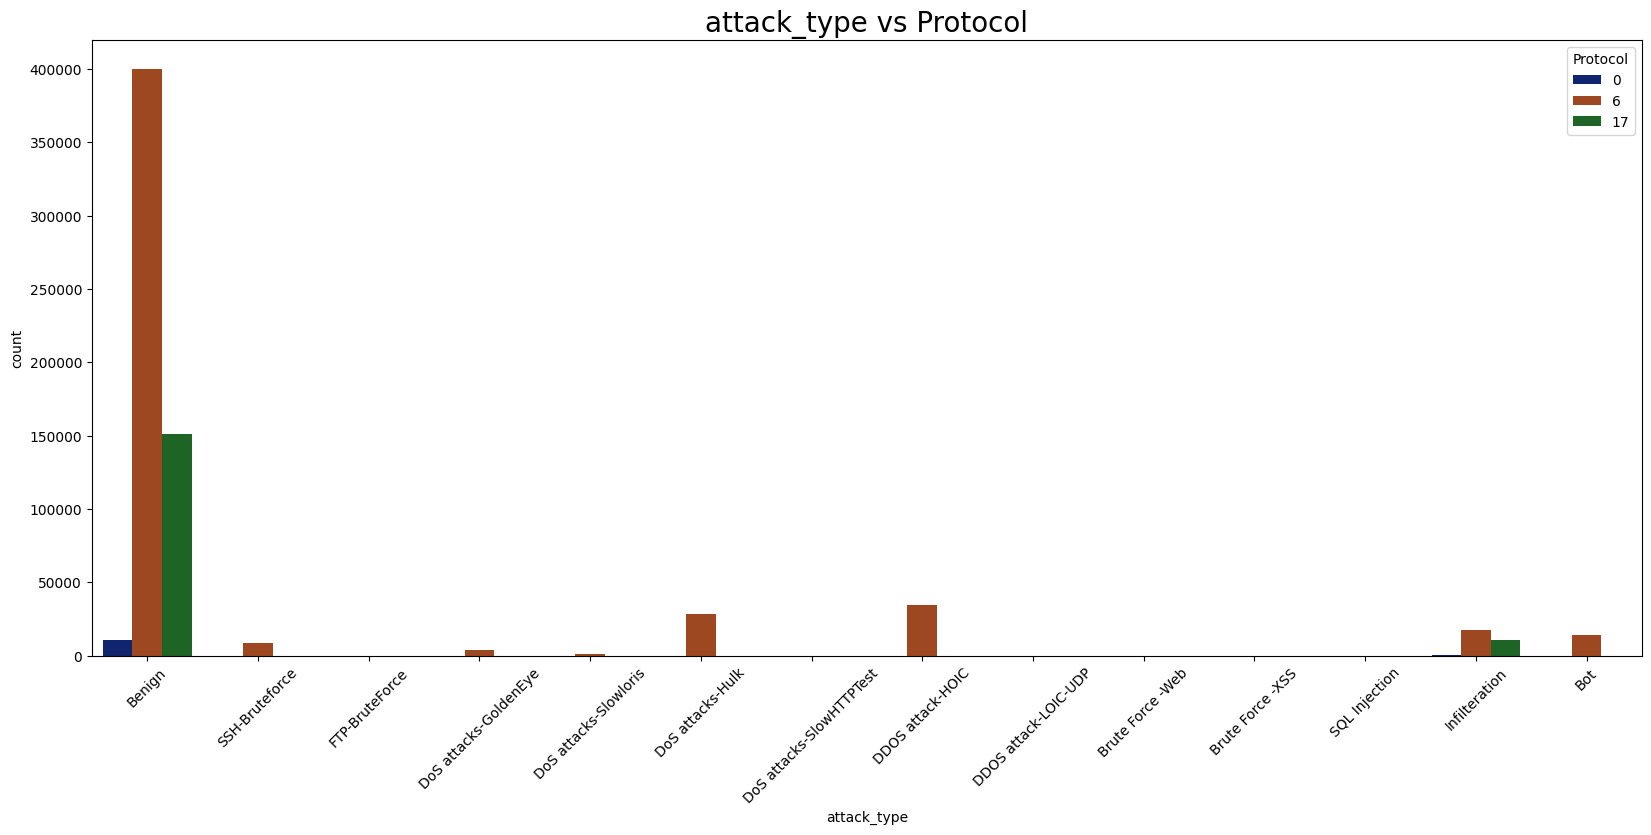

In [18]:
hist_col_vs_col('attack_type', 'Protocol')

Compare Flag SYN vs Attack

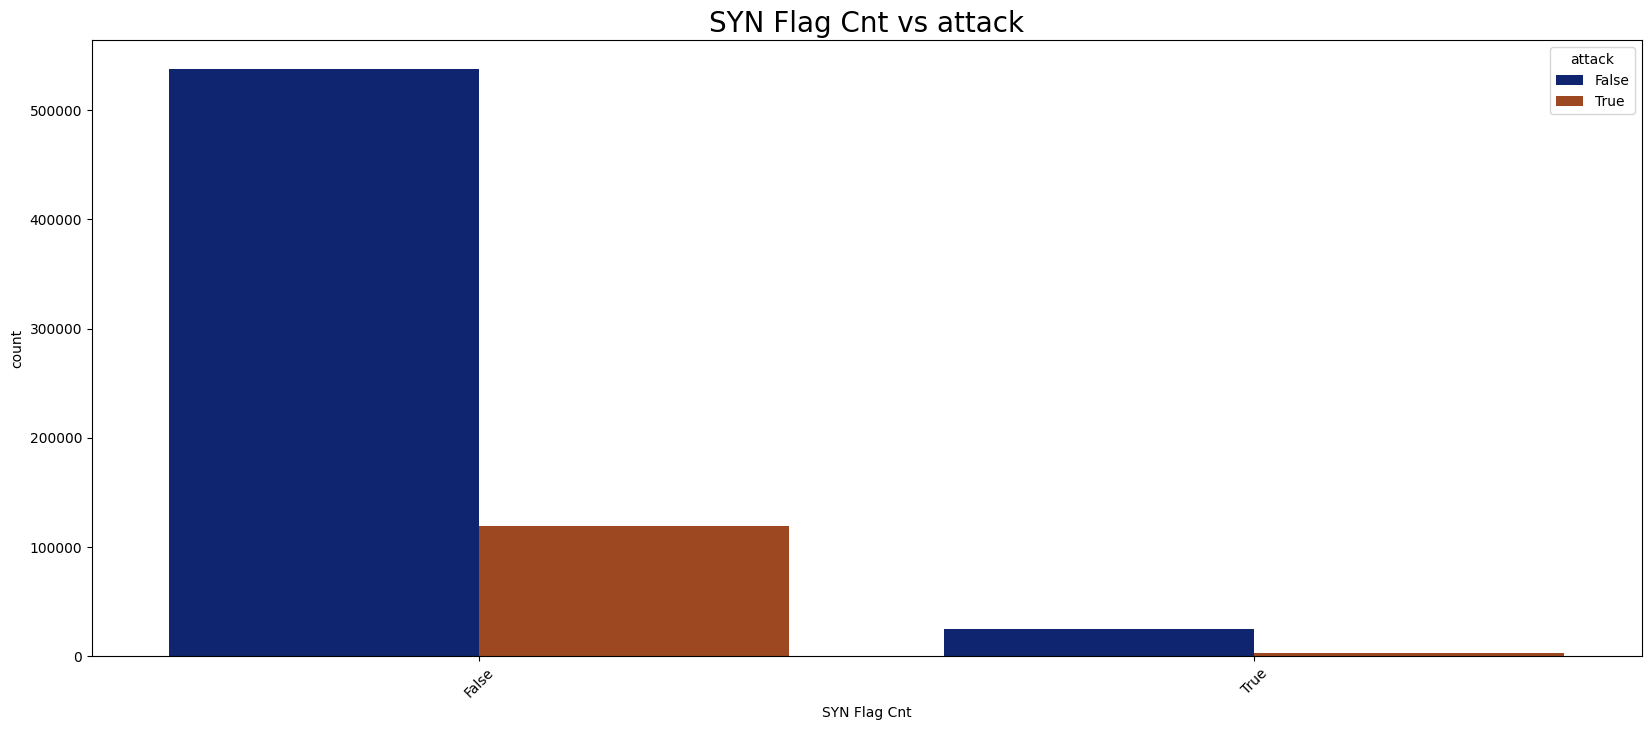

In [19]:
hist_col_vs_col('SYN Flag Cnt', 'attack')

Correlation matrix, useful for finding very correlated features

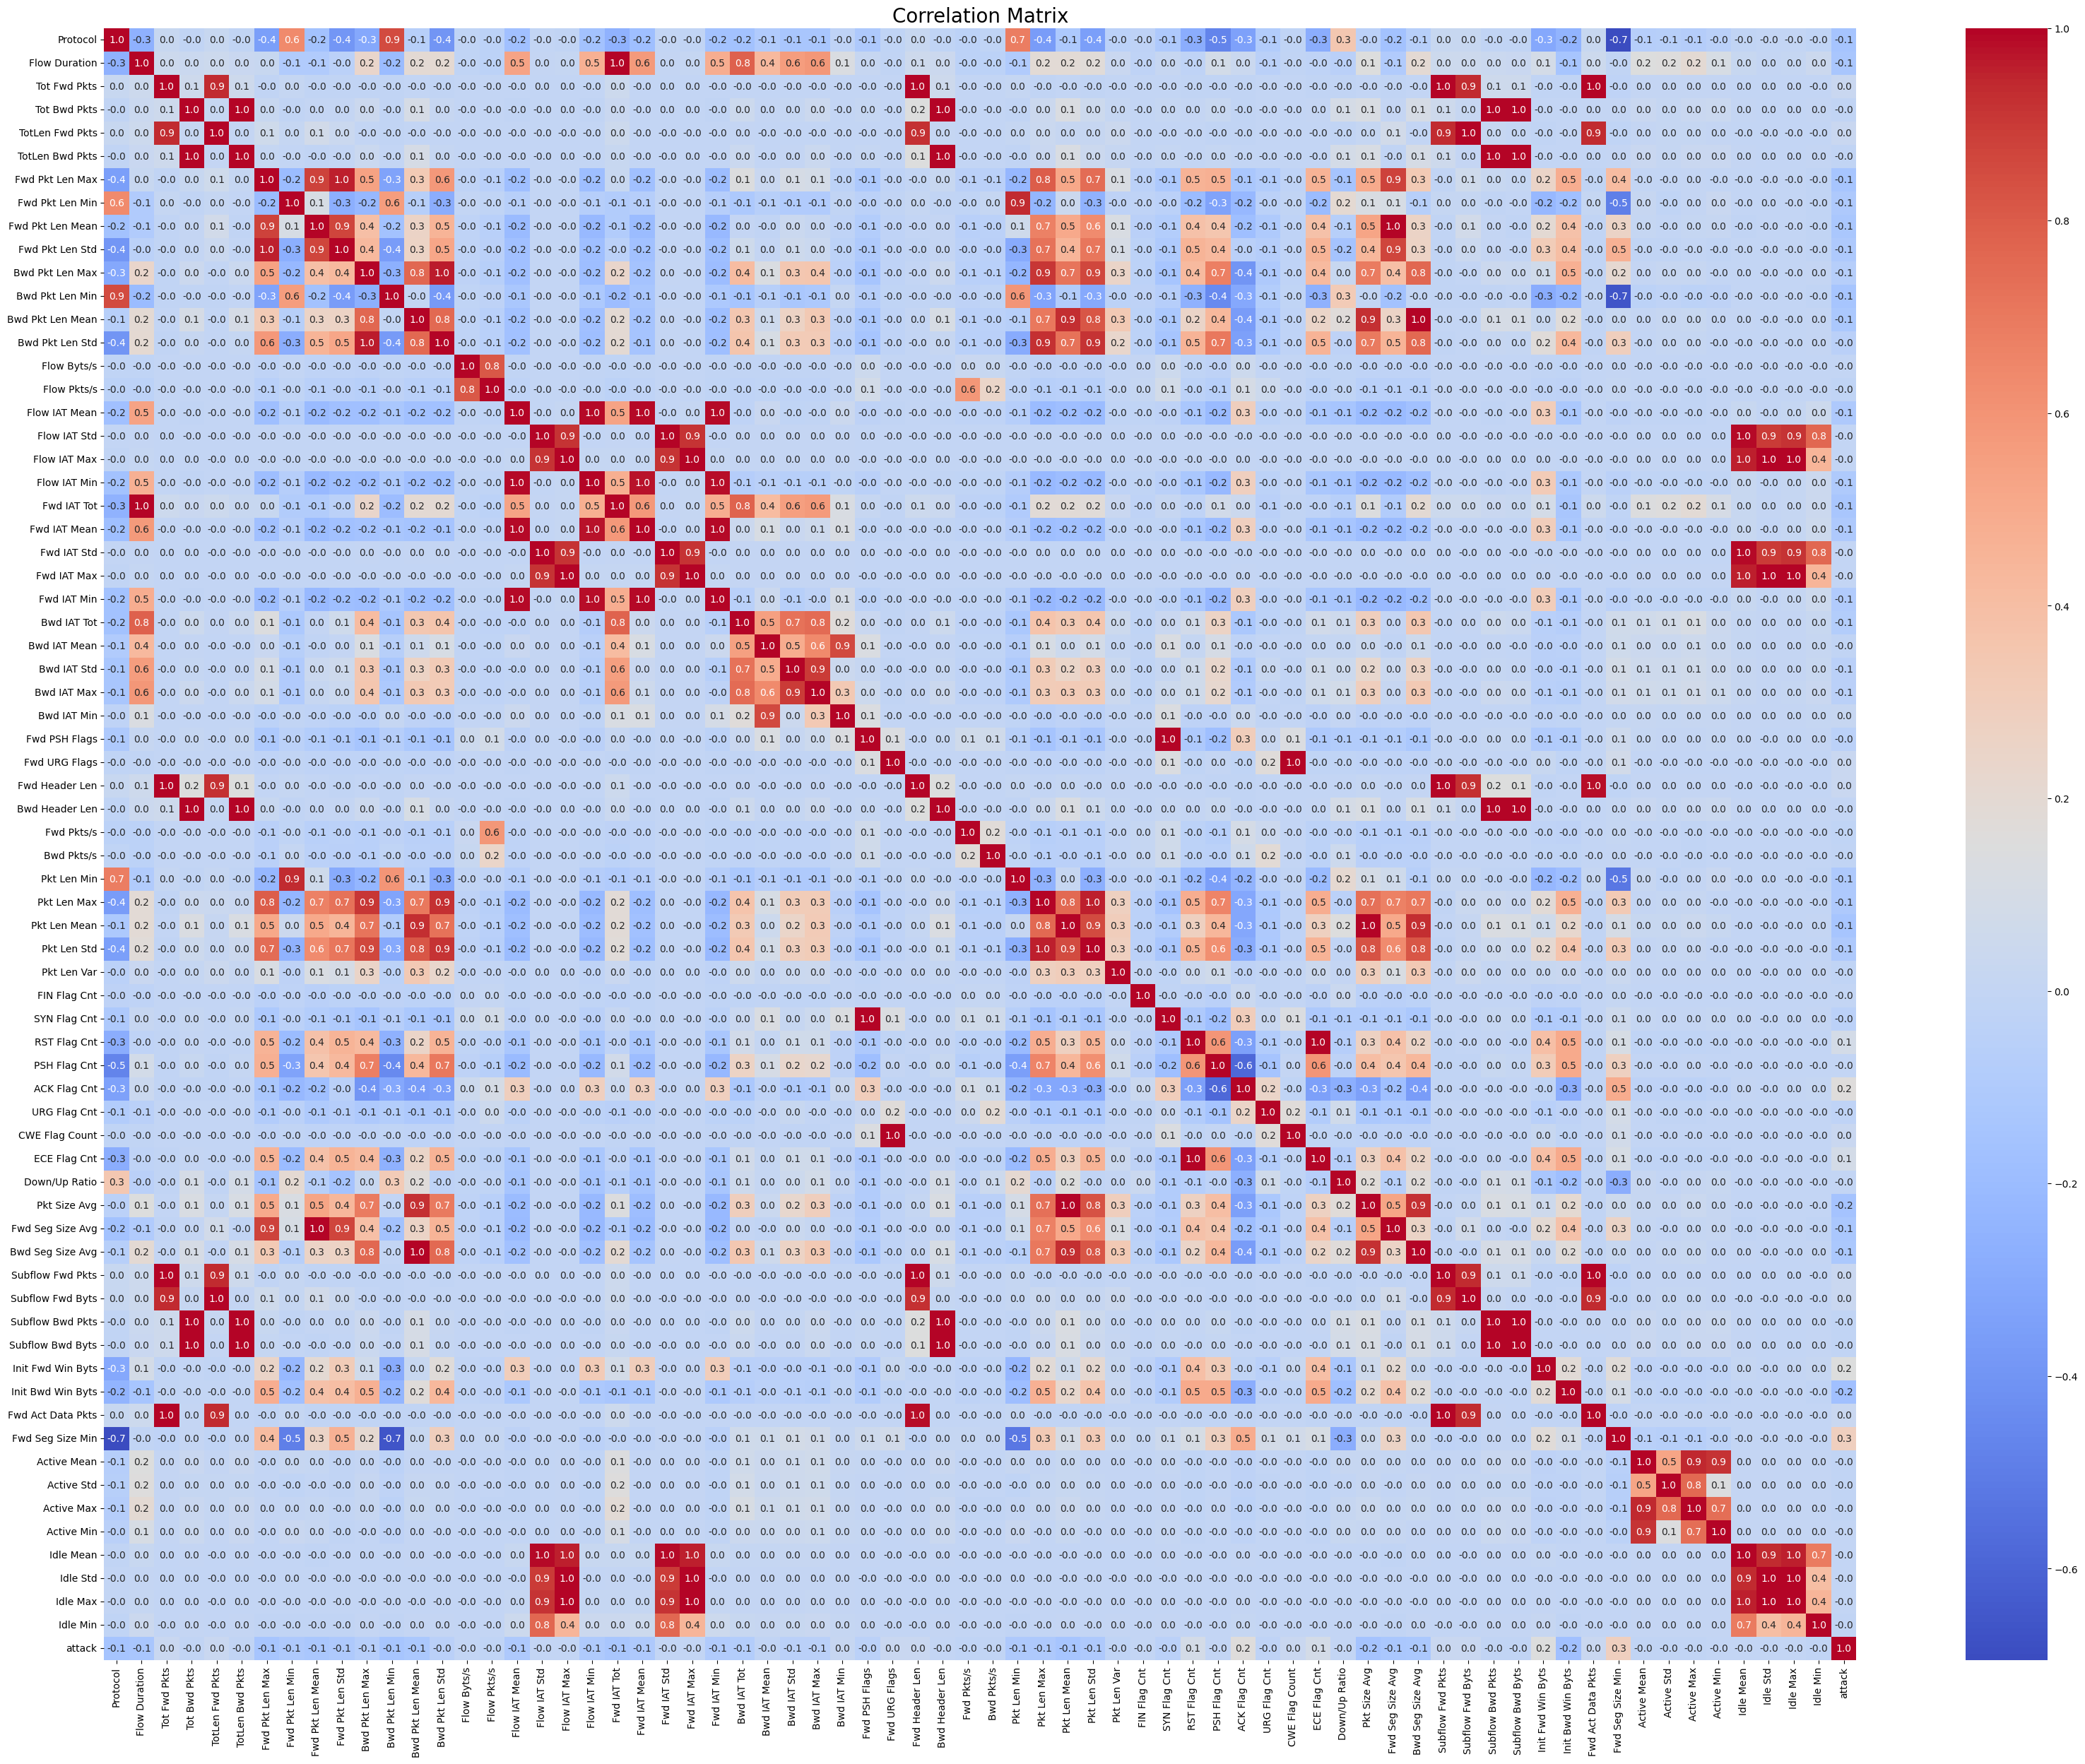

In [20]:
plt.figure(figsize=(40, 30))
correlation_matrix = df[df.select_dtypes(exclude=['object', 'category']).columns.tolist()].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 10})
plt.title("Correlation Matrix", fontsize=20)
plt.show()

Compare the subset of most correlated (|corr| > 0.5) features vs Attack

In [21]:
def compare_feature_target(feature_name):
    # Set up the plotting area with only two columns for histogram and violin plot
    _, axes = plt.subplots(1, 2, figsize=(14, 3))

    # Histogram
    sns.histplot(df[feature_name], kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"Histogram of {feature_name}", fontsize=20)
    axes[0].set_xlabel(feature_name)

    # Violin plot colored by Attack
    sns.violinplot(data=df, x='attack', y=feature_name, hue='attack', ax=axes[1])
    axes[1].set_title(f"Violin Plot of {feature_name} by Attack", fontsize=20)
    axes[1].get_legend().remove()

    plt.tight_layout()
    plt.show()

In [22]:
# Filter features with |correlation| > 0.5 w.r.t Attack and compare
target_corr = correlation_matrix['attack'].drop('attack')
for feature in target_corr[abs(target_corr) > 0.5].index.tolist():
    compare_feature_target(feature)

After aggregating data from different days with different attacks, we don't have strong enough correlations: it suggests the data is dynamic and so, other than preprocessing (e.g. scaling and FE), Continual Learning will be useful, reflecting a real life scenario.

For now, let's keep 0.2 as the threshold

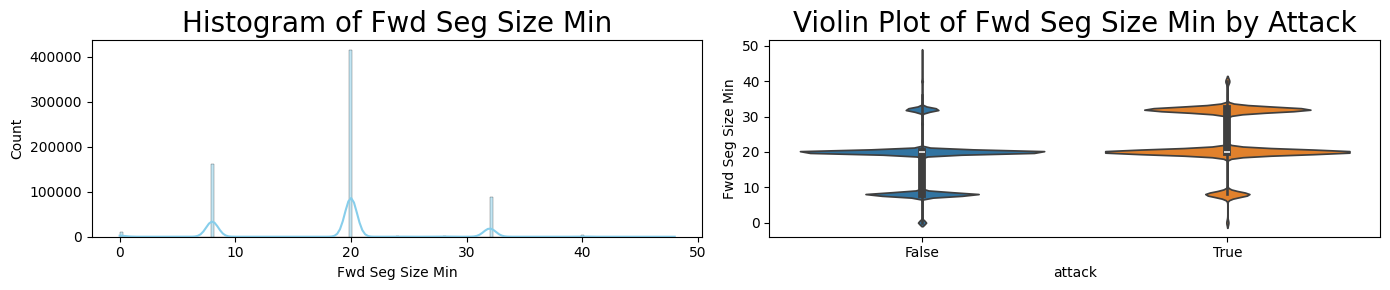

In [23]:
for feature in target_corr[abs(target_corr) > 0.2].index.tolist():
    compare_feature_target(feature)